# Backboning the network with HSS

In [4]:
import modules.backboning as bb
import networkx as nx
import pickle
from collections import Counter
import matplotlib.pyplot as plt

## Preparing correct input format

Loading in network with added edges generated using the gravity model  
All self-loops removed

In [5]:
G = nx.read_gpickle('networks/gravityNoselfloops.gpickle')

As we have an undirected network, I make sure that both directions of the edges present in the graph's edgelist with the same weights.

In [6]:
print(('Aalborg', 'Aabenraa') in G.edges and ('Aabenraa', 'Aalborg') in G.edges)
print(G['Aalborg']['Aabenraa'] == G['Aabenraa']['Aalborg'])
print(nx.info(G))

True
True
Name: 
Type: Graph
Number of nodes: 98
Number of edges: 4191
Average degree:  85.5306


Writing to tab separated weighted edgelist

In [7]:
nx.write_weighted_edgelist(G, 'networks/bb.edgelist', delimiter='\t')

! head 'networks/bb.edgelist'

Aabenraa	Aalborg	1934.0
Aabenraa	Aarhus	12247.0
Aabenraa	Assens	178.0
Aabenraa	Brønderslev	229.0
Aabenraa	København	32240.0
Aabenraa	Esbjerg	3336.0
Aabenraa	Faaborg-Midtfyn	173.0
Aabenraa	Favrskov	422.0
Aabenraa	Faxe	18.0
Aabenraa	Fredensborg	96.0


In [62]:
! wc -l 'networks/bb.edgelist'

    4191 networks/bb.edgelist


### Adding header with specified column names

In [63]:
f = open('networks/bb.edgelist', 'r')
data = f.read()
f.close()

fout = open('networks/bb.edgelist', 'w')
header = 'src\ttrg\tweight\n'
fout.write(header)
fout.write(data)
fout.close()

In [64]:
! head 'networks/bb.edgelist'

src	trg	weight
Aabenraa	Aalborg	1934.0
Aabenraa	Aarhus	12247.0
Aabenraa	Assens	178.0
Aabenraa	Brønderslev	229.0
Aabenraa	København	32240.0
Aabenraa	Esbjerg	3336.0
Aabenraa	Faaborg-Midtfyn	173.0
Aabenraa	Favrskov	422.0
Aabenraa	Faxe	18.0


In [65]:
! wc -l 'networks/bb.edgelist'

    4192 networks/bb.edgelist


## Reading in the edgelist

In [66]:
panda = bb.read('networks/bb.edgelist', column_of_interest='weight', undirected = True)
panda

(           src          trg      nij
 0     Aabenraa      Aalborg   1934.0
 1     Aabenraa       Aarhus  12247.0
 2     Aabenraa       Assens    178.0
 3     Aabenraa  Brønderslev    229.0
 4     Aabenraa    København  32240.0
 ...        ...          ...      ...
 4186     Ishøj     Syddjurs     95.0
 4187     Ishøj       Stevns    409.0
 4188     Ishøj      Billund     40.0
 4189     Ishøj        Samsø      6.0
 4190     Ishøj         Fanø      4.0
 
 [4190 rows x 3 columns], 98, 2095.0)

We have a zero-value for one of the edge-weights, so that edge is dropped. This is why we are down to 4190 edges.

In [67]:
table, n_nodes, n_edges = panda

# High-Salience Skeleton

Exchange structure focus -- shortest path membership edgeweight calibration

In [68]:
hss_table = bb.high_salience_skeleton(table, undirected=True)

hss_table['score'].max()

Calculating HSS score...


0.49489795918367346

In [69]:
#hss_test = bb.test_densities(hss_table, 0, 0.4, 0.1)
#for s in hss_test:
#    print(s)

In [70]:
hss_test = bb.test_densities(hss_table, 0.1, 0.2, 0.01)
for s in hss_test:
    print(s)

(0.1, 98, 100.0, 1379, 32.911694510739856, 28.142857142857142, 0.3291169451073986)
(0.11, 98, 100.0, 1303, 31.09785202863962, 26.591836734693878, 0.3109785202863962)
(0.12, 97, 98.9795918367347, 1235, 29.474940334128878, 25.463917525773194, 0.2977880569839825)
(0.13, 97, 98.9795918367347, 1204, 28.73508353221957, 24.824742268041238, 0.29031321506778535)
(0.14, 97, 98.9795918367347, 1148, 27.39856801909308, 23.670103092783506, 0.27681027483207443)
(0.15000000000000002, 97, 98.9795918367347, 1096, 26.157517899761338, 22.5979381443299, 0.2642718303274857)
(0.16000000000000003, 97, 98.9795918367347, 1023, 24.41527446300716, 21.09278350515464, 0.24666978323450534)
(0.17000000000000004, 96, 97.95918367346938, 1008, 24.057279236276848, 21.0, 0.24558472553699284)
(0.18000000000000005, 93, 94.89795918367346, 989, 23.60381861575179, 21.268817204301076, 0.24872841121975006)
(0.19000000000000006, 91, 92.85714285714286, 966, 23.05489260143198, 21.23076923076923, 0.2482834587846521)


In [76]:
hss_test = bb.test_densities(hss_table, 0.10, 0.12, 0.001)
for s in hss_test:
    print(s)

(0.1, 98, 100.0, 1379, 32.911694510739856, 28.142857142857142, 0.3291169451073986)
(0.101, 98, 100.0, 1379, 32.911694510739856, 28.142857142857142, 0.3291169451073986)
(0.10200000000000001, 98, 100.0, 1379, 32.911694510739856, 28.142857142857142, 0.3291169451073986)
(0.10300000000000001, 98, 100.0, 1331, 31.766109785202865, 27.163265306122447, 0.3176610978520286)
(0.10400000000000001, 98, 100.0, 1331, 31.766109785202865, 27.163265306122447, 0.3176610978520286)
(0.10500000000000001, 98, 100.0, 1331, 31.766109785202865, 27.163265306122447, 0.3176610978520286)
(0.10600000000000001, 98, 100.0, 1331, 31.766109785202865, 27.163265306122447, 0.3176610978520286)
(0.10700000000000001, 98, 100.0, 1331, 31.766109785202865, 27.163265306122447, 0.3176610978520286)
(0.10800000000000001, 98, 100.0, 1303, 31.09785202863962, 26.591836734693878, 0.3109785202863962)
(0.10900000000000001, 98, 100.0, 1303, 31.09785202863962, 26.591836734693878, 0.3109785202863962)
(0.11000000000000001, 98, 100.0, 1303, 31.

The result stabilises for $0.108 \leq t \leq 0.112$.  
Here we keep all nodes, but only 31.098 % of the edges.

### Exporting HSS backboned network

In [88]:
hss_backbone = bb.thresholding(hss_table, 0.108)
bb.write(hss_backbone, "mobility", "hss", "networks")

Removing the header from the edgelist file.

In [89]:
! wc -l networks/mobility_hss.csv

!echo "$(tail -n +2 networks/mobility_hss.edgelist)" > networks/mobility_hss.edgelist
! wc -l networks/mobility_hss.csv

    1304 networks/mobility_hss.csv
    1303 networks/mobility_hss.csv


In [90]:
G = nx.read_edgelist('networks/mobility_hss.edgelist', nodetype=str, data=(('weight', float),('HSS_score', float)))

with open('data/population.pickle', 'rb') as f:
    pop = pickle.load(f)

nx.set_node_attributes(G, pop, name='Population size')

nx.write_gpickle(G, "networks/final_topology.gpickle")

# Descriptive statistics of the final network

In [130]:
print(nx.info(G))
print('diameter: ',nx.diameter(G))
print('avg. shortest path length: ', nx.average_shortest_path_length(G))

Name: 
Type: Graph
Number of nodes: 98
Number of edges: 1303
Average degree:  26.5918
diameter:  4
avg. shortest path length:  1.8754470860509151


### Degree distribution

57


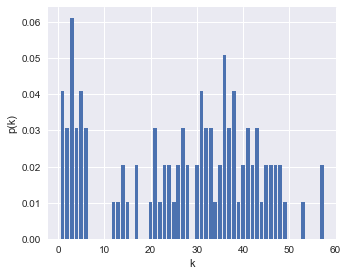

In [143]:
degree_cnts = Counter(list(dict(G.degree).values()))
norm_cnts = [c/98 for c in degree_cnts.values()]
degrees = [k for k in degree_cnts.keys()]

print(max(degrees))
"""
fig, ax1 = plt.subplots(1, figsize=(5,4))#, dpi=200)
color = 'tab:blue'
ax1.scatter(degrees, norm_cnts)
ax1.set_xlabel('k')
ax1.set_ylabel('p(k)')
plt.xscale('log')
fig.tight_layout()
#plt.savefig('visualisations/peaks.jpg')
plt.show()
"""
import seaborn as sns
sns.set()

fig, ax1 = plt.subplots(1, figsize=(5,4))#, dpi=200)
color = 'tab:blue'
ax1.bar(degrees, norm_cnts)
ax1.set_xlabel('k')
ax1.set_ylabel('p(k)')
fig.tight_layout()
#plt.savefig('visualisations/degree_distribution.jpg')
plt.show()

### Edge Weight Distribution

0.00920951650038373


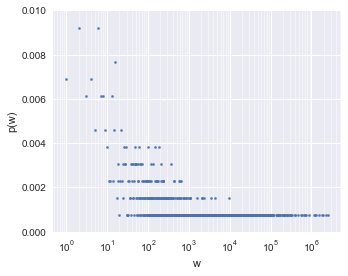

In [182]:
import matplotlib

weight_cnts = Counter(list(dict(nx.get_edge_attributes(G,'weight')).values()))
weight_norm_cnts = [c/1303 for c in weight_cnts.values()]
weights = [w for w in weight_cnts.keys()]

print(max(weight_norm_cnts))
fig, ax1 = plt.subplots(1, figsize=(5,4))#, dpi=200)
color = 'tab:blue'
"""
ax1.hist(weights, 100, density=True)#
"""
ax1.scatter(weights, weight_norm_cnts, s=5)
ax1.set_ylim(0,0.01)
ax1.set_xlabel('w')
ax1.set_ylabel('p(w)')
ax1.set_xscale('log')
#ax1.set_yscale('log')
ax1.grid(b=True, which='minor', color='w', linewidth=0.5)
fig.tight_layout()
#plt.savefig('visualisations/weight_distribution.jpg')
plt.show()